## Observations and Insights 

### OBSERVATIONS:  See analysis document in the github folder for figs and such.
For my first conclusion, is that the drug Capomulin appears to have to be the drug used the most in the trials.  This drug also appears to be pretty effective as it appears to have the smallest range of standard deviations.  Because of this, I’ve choosen to focus more on its effects within the next two conclusions![

For my second conclusion, when choosing a random mouse (in this instance Mouse ID: r944, or as I loving call Barry), we can see that initially her treatment regimen with the drug Capomulin resulted in an increase of tumor volume.  However, overtime we can see that the tumor vol decreases with the volume stabilizing around 25 days on!

For my final conclusion, there is a strong correlation between the mouse’s weight and the average tumor volume while on the drug regimen of Capomulin; where the correlation coefficient is .834.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedDF = mouse_metadata.merge(study_results, on='Mouse ID')
# Display the data table for preview
combinedDF.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#study_results.head(1)
cntStudy = study_results["Mouse ID"].count()
cntStudy

1893

In [3]:
#mouse_metadata.head(1)
cntMouses = mouse_metadata["Mouse ID"].count()
cntMouses

249

In [4]:
# Checking the number of mice.
#combinedDF.count()
cnts = combinedDF["Mouse ID"].count()
uniCnts = combinedDF["Mouse ID"].nunique()
output = (f"Mouse ID Counts: {int(cnts)} \n"
          f"Mouse ID Distinct Counts: {int(uniCnts)} \n"
         )
print(output)

Mouse ID Counts: 1893 
Mouse ID Distinct Counts: 249 



In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
groupedDF = combinedDF.groupby(["Mouse ID","Timepoint"]).count()
dupes = groupedDF.loc[(groupedDF["Drug Regimen"]>1)]
dupes

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedDF.loc[(combinedDF["Mouse ID"]=="g989")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedDF = combinedDF.loc[(combinedDF["Mouse ID"] != "g989")]
cleanedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
cleanedDF.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
selectDF = cleanedDF[["Drug Regimen","Tumor Volume (mm3)"]]
groupDF = selectDF.groupby("Drug Regimen")
mean = groupDF["Tumor Volume (mm3)"].mean()
median = groupDF["Tumor Volume (mm3)"].mean()
variance = groupDF["Tumor Volume (mm3)"].var()
std = groupDF["Tumor Volume (mm3)"].std()
sem = groupDF["Tumor Volume (mm3)"].sem()

summaryDF = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "Standard Deviation":std,
    "SEM":sem
})

formatSummary= {"Mean":"{0:,.3f}"\
                ,"Median": "{0:,.3f}"\
                ,"Variance": "{0:,.3f}"\
                ,"Standard Deviation": "{0:,.3f}"\
                ,"SEM": "{0:,.3f}"\
              }
summaryDF.style.format(formatSummary)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,40.676,24.948,4.995,0.329
Ceftamin,52.591,52.591,39.290,6.268,0.470
Infubinol,52.885,52.885,43.129,6.567,0.492
Ketapril,55.236,55.236,68.554,8.280,0.604
Naftisol,54.332,54.332,66.173,8.135,0.596
Placebo,54.034,54.034,61.168,7.821,0.581
Propriva,52.321,52.321,43.852,6.622,0.544
Ramicane,40.217,40.217,23.487,4.846,0.321
Stelasyn,54.233,54.233,59.451,7.710,0.573


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Using the aggregation method, produce the same summary statistics in a single line
aggDF = cleanedDF.groupby("Drug Regimen").agg(**{
        "Mean":("Tumor Volume (mm3)", "mean")
        ,"Median":("Tumor Volume (mm3)","median")
        ,"Variance":("Tumor Volume (mm3)","var")
        ,"Standard Deviation":("Tumor Volume (mm3)","std")
        ,"SEM":("Tumor Volume (mm3)","sem")
})

formatAggDF = {"Mean":"{0:,.3f}"\
                ,"Median": "{0:,.3f}"\
                ,"Variance": "{0:,.3f}"\
                ,"Standard Deviation": "{0:,.3f}"\
                ,"SEM": "{0:,.3f}"\
              }

aggDF.style.format(formatAggDF)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

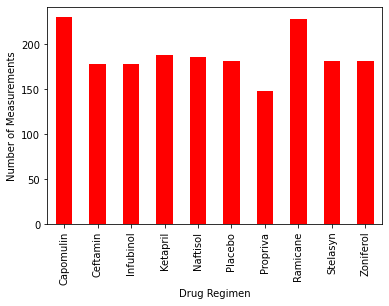

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupDrug = cleanedDF.groupby('Drug Regimen')
countDrug = groupDrug['Drug Regimen'].count()

countChart = countDrug.plot(kind="bar", 
                            facecolor="red", 
                            xlabel="Drug Regimen", 
                            ylabel="Number of Measurements")

#print(countDrug) #sanity check

countChart
plt.show()

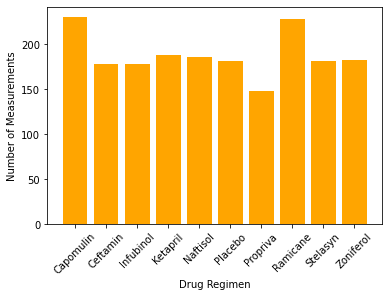

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

groupDrugPly = cleanedDF.groupby('Drug Regimen')
countDrugPly = groupDrugPly['Drug Regimen'].count()

xAxis=np.arange(len(groupDrugPly))
tickLocs=[value for value in xAxis]
tickLocs

plt.bar(xAxis, countDrugPly, color="orange", tick_label=countDrugPly.index.values)
plt.xlabel('Drug Regimen')
plt.ylabel("Number of Measurements")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:title={'center':'BY Sex'}>

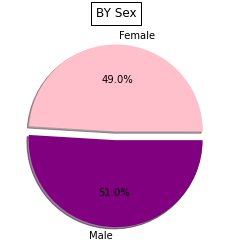

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupGen = cleanedDF.groupby('Sex')
countGen = groupGen['Sex'].count()

countChart = countGen.plot(kind="pie" 
                        ,colors=['pink','purple']
                        ,explode=[0,.1]
                        ,xlabel=''
                        ,ylabel=''
                        ,shadow=True
                        ,autopct='%1.1f%%')

plt.title("BY Sex",bbox={'facecolor':'1', 'pad':5})
countChart


Text(0.5, 1.0, 'By Sex')

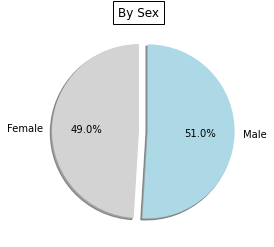

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
groupGenPly = cleanedDF.groupby('Sex')
countGenPly = groupGenPly['Sex'].count()

plt.pie(countGenPly
        ,colors=['lightgrey','lightblue']
        ,explode=[0,.1]
        ,shadow=True
        ,autopct='%1.1f%%'
        ,labels=countGenPly.index.values
        ,startangle=90
       )

plt.title("By Sex", bbox={'facecolor':'1', 'pad':5}) #GOOGLE FTW!!!!


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
startingDF = cleanedDF[cleanedDF["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
#startingDF #sanity check

# Start by getting the last (greatest) timepoint for each mouse
groupMouseTP = startingDF.groupby(['Mouse ID'])['Timepoint'].max().reset_index() #GOOGLE AGAIN FTW!
#print(groupMouseTP) #sanity check

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combinedMouseMax = startingDF.merge(groupMouseTP, left_on="Mouse ID", right_on="Mouse ID"
                                   ,how="left"
                                  ,suffixes=('_cln','_max'))
combinedMouseMax.head(3) #sanity check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_cln,Tumor Volume (mm3),Metastatic Sites,Timepoint_max
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = startingDF["Drug Regimen"].unique().tolist()
treatments.sort() #adding this so I can cheat on my boxplot :). You'll see what I mean below

# Create empty list to fill with tumor vol data (for plotting)
empList=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    print(f"Drug Regimen: {drug}") #did this to create grouped readability in output
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugSpec = combinedMouseMax.loc[(combinedMouseMax["Drug Regimen"] == drug) & 
                                    (combinedMouseMax["Timepoint_cln"] == combinedMouseMax["Timepoint_max"])]
    #print(drugSpec.head()) #tricky sanity check as without print I couldn't get output
    
    # add subset
    tumVolVals = drugSpec["Tumor Volume (mm3)"]
    empList.append(tumVolVals)
    #print(f"Drug: {drug}, EmplList: {empList}") #sanity check

    # Determine outliers using upper and lower bounds
    #quartiles
    quartiles =  tumVolVals.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #bounds
    lbound = lowerq - (1.5*iqr)
    ubound = upperq + (1.5*iqr)
    print(f"Lower Q:{round(lowerq,3)}\nUpper Q:{round(upperq,3)}\nIQR:{round(iqr,3)}\nLBound:{round(lbound,3)}\nUBound:{round(ubound,3)}") #fun sanity check
    
    outliers = drugSpec.loc[(drugSpec["Tumor Volume (mm3)"] > ubound) | 
                            (drugSpec["Tumor Volume (mm3)"] < lbound)]
    
    if outliers.empty != True:
        print(f'Outliers for {drug}: {outliers["Mouse ID"]}') #I don't like this output.....but lazy
    print("--------------------------------\n") #did this to create grouped readability in output
    

Drug Regimen: Capomulin
Lower Q:32.377
Upper Q:40.159
IQR:7.782
LBound:20.705
UBound:51.832
--------------------------------

Drug Regimen: Ceftamin
Lower Q:48.722
Upper Q:64.3
IQR:15.578
LBound:25.355
UBound:87.666
--------------------------------

Drug Regimen: Infubinol
Lower Q:54.049
Upper Q:65.526
IQR:11.477
LBound:36.833
UBound:82.741
Outliers for Infubinol: 526    c326
Name: Mouse ID, dtype: object
--------------------------------

Drug Regimen: Ramicane
Lower Q:31.56
Upper Q:40.659
IQR:9.099
LBound:17.913
UBound:54.307
--------------------------------



<function matplotlib.pyplot.show(close=None, block=None)>

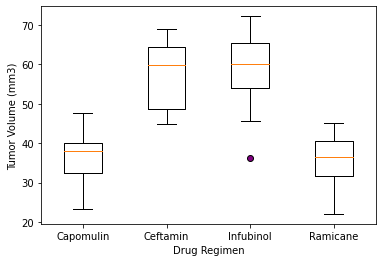

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fprops=dict(markerfacecolor='purple')

plt.boxplot(empList, flierprops=fprops)

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4],treatments) #my drug regimens are alpha ordered
plt.show

## Line and Scatter Plots

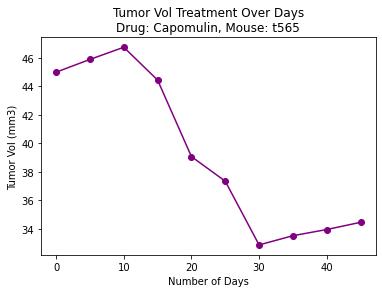

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
import random #gettin fancy with picking a mouse

#variablelizing drug for fun.  easily changable
drg = "Capomulin"

#create list of mice because I couldn't get pandas to do this cleanly
mouseList = combinedMouseMax["Mouse ID"].loc[(combinedMouseMax["Drug Regimen"] == drg)].unique().tolist()

#picking a random mouse id based on the drug
ranMouseID = random.choice(mouseList)
# print(ranMouseID) #sanity check
# combinedMouseMax.loc[combinedMouseMax["Mouse ID"] == ranMouseID] #sanity check 2

#build chart
pltMices = combinedMouseMax.loc[(combinedMouseMax["Mouse ID"] == ranMouseID) &
                               (combinedMouseMax["Drug Regimen"] == drg)] #from sanity check 2, but better....

pltX = pltMices['Timepoint_cln']
pltY = pltMices['Tumor Volume (mm3)']

plt.plot(pltX, pltY, marker="o", color="purple")
plt.title(f"Tumor Vol Treatment Over Days\nDrug: {drg}, Mouse: {ranMouseID}")
plt.xlabel("Number of Days")
plt.ylabel("Tumor Vol (mm3)")
plt.show()

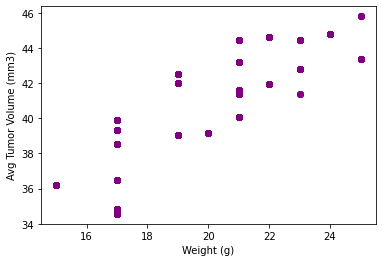

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drgDF = combinedMouseMax.loc[(combinedMouseMax["Drug Regimen"] == drg)] #reused 'drg' from above

# Getting averages
avgGrp = drgDF.groupby("Mouse ID").agg(**{"Avg Tumor Volume":("Tumor Volume (mm3)", "mean")})
#avgGrp #sanity check

comparedDF = drgDF.merge(avgGrp, left_on="Mouse ID", right_on="Mouse ID")
#compareDF #sanity check

#get plot (dot) data
dotX = comparedDF["Weight (g)"]
dotY = comparedDF["Avg Tumor Volume"]

plt.scatter(dotX, dotY, color="purple")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between weight and Avg Tumor Volume (mm3) for Capomulin is 0.834. This implies a strong relationship



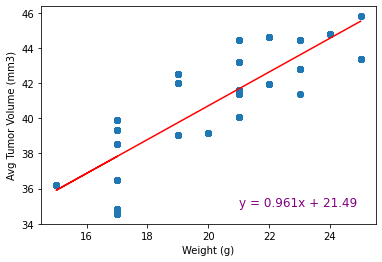

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

######## HEAVILY REUSED OBJECTS FROM ABOVE

#calculate correlation coeff
corCoef = st.pearsonr(dotX, dotY)
#print(corCoef) #do I have to say sanity check?

#create output syntax based on correlation coeff
if abs(corCoef[0]) > .7: # i believe this was in the class slides for day 3.
    outputStr = "strong"
else:
    outputStr = "weak"
    
print(f"The correlation between weight and Avg Tumor Volume (mm3) for {drg} is {round(abs(corCoef[0]),3)}. This implies a {outputStr} relationship\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(dotX, dotY)
regressVals = dotX * slope + intercept
lineEQ =  "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

plt.scatter(dotX,dotY)
plt.plot(dotX,regressVals,"r-")

#annotating because we learned this in class :)
plt.annotate(lineEQ,(21,35),fontsize=12,color="purple")

#label time
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()
